# Data Reading

02.05.2022 Merge my Reading ARFF project to Data Reading notebook. Also updated other portions in the markdown and codes.

24.04.2022 First class exposure on how to read and setup data in Python. Created markdowns, added codes and improve lines to demonstrate familiarity after the Data Mining course has finished.

## Load all libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import json

from scipy.io import arff # package needed to load the arff file
import urllib.request # package needed to load the arff file
import io
from io import StringIO #The StringIO module an in-memory file-like object. 

# Useful code to remove unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Read CSV

Keynote here is that read_csv does not only read csv files but also defined texts.

### Item 1 
Read the created in-memory file `one`and create a DataFrame out of it.

In [2]:
one = StringIO('''p,    s,   m
1, 2, 3
4, 5, 6
7, 8, 9
''')

**Your answer below:**

In [3]:
df = pd.read_csv(one)
df


,p,s,m
0,1,2,3
1,4,5,6
2,7,8,9


We assume here that p, s and m are column names and row index were not provided.

### Item 2
Read the created in-memory file `two`and create a DataFrame wherein all cells without values in the CSV are assigned as `NaN`.

In [4]:
two = StringIO('''1, 2, 3
4, 5
7
''')

**Your answer below:**

In [5]:
df = pd.read_csv(two, header=None, index_col=False)
df

,0,1,2
0,1,2.0,3.0
1,4,5.0,NaN
2,7,NaN,NaN


## Read Excel

### Item 3
Reads `NCR.xlsx` and returns a DataFrame with two columns: 'City, Municipality, and Barangay' and 'Total Population'

**Your answer below:**

In [6]:
data = pd.read_excel('NCR.xlsx',skiprows=5,usecols=[1,2])

# Convert to dataframe
df = pd.DataFrame(data)

# Define your column name
df.columns = ['Total Population by City, Municipality and Barangay', 'Total Population']

# Remove the nulls
df_final = df.loc[pd.notnull(df.iloc[:,1]),:]

df_final

,"Total Population by City, Municipality and Barangay",Total Population
0,NATIONAL CAPITAL REGION,12877253.0
2,CITY OF MANILA,1780148.0
4,TONDO,631363.0
5,Barangay 1,1976.0
6,Barangay 2,1662.0
...,...,...
1766,North Signal Village,32112.0
1767,Pinagsama,57343.0
1768,San Miguel,8590.0
1769,South Daang Hari,19166.0


## Read Json File

### Item 4
Read a json file with path `https://raw.githubusercontent.com/domoritz/maps/master/data/iris.json` then creates a Pandas DataFrame.

**Your answer below:**

In [7]:
df = pd.read_json('https://raw.githubusercontent.com/domoritz/maps/master/data/iris.json')
df


,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Read Zipped Format File

### Item 5
Read `listings.csv.gz` then creates the Excel file airbnb.xlsx

**Your answer below:**

In [8]:
df = pd.read_csv('listings.csv.gz', compression='gzip')
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,picture_url,host_id,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
0,600795,https://www.airbnb.com/rooms/600795,20150406154443,2015-04-06,London Zone1 LOFT 1Bed/1Lounge flat,"Really Gorgeous LOFT flat for 1-5 people, near...","GREAT VALUE, YET VERY COMFORTABLE FLAT NEAR ZO...","Really Gorgeous LOFT flat for 1-5 people, near...",https://a0.muscache.com/ic/pictures/8253726/36...,485861,...,9.0,8.0,9.0,8.0,8.0,f,NaN,NaN,8,2.1
1,4530027,https://www.airbnb.com/rooms/4530027,20150406154443,2015-04-07,Double room 20mins to Oxford Street,Double room available in a beautifully develop...,NaN,Double room available in a beautifully develop...,https://a1.muscache.com/ic/pictures/56886040/2...,23486604,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,1,NaN
2,896177,https://www.airbnb.com/rooms/896177,20150406154443,2015-04-06,Cosy room for 1 or 2 in Kennington,NaN,Private room with large windows onto and direc...,Private room with large windows onto and direc...,https://a1.muscache.com/ic/pictures/13227237/3...,4777568,...,10.0,10.0,10.0,9.0,10.0,f,NaN,NaN,1,0.4
3,3770567,https://www.airbnb.com/rooms/3770567,20150406154443,2015-04-06,Double Room with large garden,A ground floor room in the heart of Islington....,NaN,A ground floor room in the heart of Islington....,https://a0.muscache.com/ic/pictures/47447139/6...,11255553,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,1,NaN
4,4292560,https://www.airbnb.com/rooms/4292560,20150406154443,2015-04-07,Superb 3BR House Notting Hill VP,Fabulous 3 bedroom Mews house in Notting Hill ...,This house contains a cosy living room on the ...,Fabulous 3 bedroom Mews house in Notting Hill ...,https://a1.muscache.com/ic/pictures/67441108/4...,1432477,...,9.0,9.0,9.0,9.0,8.0,f,NaN,NaN,100,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18431,1313539,https://www.airbnb.com/rooms/1313539,20150406154443,2015-04-07,Liverpool Street Double Room *11,Hello dear visitors and welcome to our Monopol...,"Hi, WE HAVE BRIGHT AND SPACIOUS FULLY FURNISHE...",Hello dear visitors and welcome to our Monopol...,https://a2.muscache.com/ic/pictures/63084242/c...,7106582,...,9.0,9.0,9.0,9.0,9.0,f,NaN,NaN,10,4.9
18432,680656,https://www.airbnb.com/rooms/680656,20150406154443,2015-04-07,"Great Triple Studio, in Hammermith",NaN,Just a 2-minute walk from Hammersmith Tube Sta...,Just a 2-minute walk from Hammersmith Tube Sta...,https://a2.muscache.com/ic/pictures/12438816/3...,216660,...,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,9,0.4
18433,5373885,https://www.airbnb.com/rooms/5373885,20150406154443,2015-04-07,Double En-suite,Well furnished double bedroom with attache...,NaN,Well furnished double bedroom with attache...,https://a2.muscache.com/ic/pictures/67458346/1...,23211855,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,3,NaN
18434,586400,https://www.airbnb.com/rooms/586400,20150406154443,2015-04-07,"Modern, stylish apartment in Camden",NaN,Our Camden apartment is within close proximity...,Our Camden apartment is within close proximity...,https://a1.muscache.com/ic/pictures/7303558/35...,2890674,...,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,1,NaN


In [9]:
# Save to excel
df.to_excel("airbnb.xlsx")

## **Read ARFF File from OpenML.org**

ARFF means Attribute-Relation File Format. Below code helped me read an ARFF file from OpenML.org.

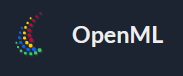

In OpenML, we can download the JSON file to and get the link to ARFF there.

### Item 6

Read the `42728.json` file.

In [10]:
df = pd.read_json('42728.json')
df

,data_set_description
collection_date,2013
default_target_attribute,DepDelay
description,Airlines Departure Delay Prediction (Regressio...
description_version,1
file_id,22044760
format,ARFF
id,42728
licence,CC0
md5_checksum,ddf153767b728faa717c2ae0063c7987
minio_url,http://openml1.win.tue.nl/dataset42728/dataset...


In [11]:
url = df.loc['url','data_set_description']
url

'https://old.openml.org/data/v1/download/22044760/Airlines_DepDelay_10M.arff'

### Item 7

Use the URL to load `Airlines_DepDelay_10M.arff`.

In [12]:
ftpstream = urllib.request.urlopen(url)
data, meta = arff.loadarff(io.StringIO(ftpstream.read().decode('utf-8')))

### Item 8

Transform the airline data into a pandas dataset.

In [13]:
data

array([(  2., 10., 30., 5.,  900., 1152., b'AA', b'JFK', b'LAX', 2475.),
       ( 12., 10.,  4., 7., 1300., 1535., b'AA', b'LAX', b'HNL', 2556.),
       (  8., 10., 11., 7., 1300., 1535., b'AA', b'LAX', b'HNL', 2556.),
       ...,
       ( -6.,  7., 31., 3., 1050., 1332., b'YV', b'PNS', b'CLT',  488.),
       ( 21.,  7., 31., 3., 1721., 1854., b'YV', b'PWM', b'ORD',  900.),
       (-10.,  7., 31., 3.,  800.,  912., b'YV', b'TUS', b'PHX',  110.)],
      dtype=[('DepDelay', '<f8'), ('Month', '<f8'), ('DayofMonth', '<f8'), ('DayOfWeek', '<f8'), ('CRSDepTime', '<f8'), ('CRSArrTime', '<f8'), ('UniqueCarrier', 'S6'), ('Origin', 'S3'), ('Dest', 'S3'), ('Distance', '<f8')])

In [14]:
meta

Dataset: trainr_10M
	DepDelay's type is numeric
	Month's type is numeric
	DayofMonth's type is numeric
	DayOfWeek's type is numeric
	CRSDepTime's type is numeric
	CRSArrTime's type is numeric
	UniqueCarrier's type is nominal, range is ('9E', 'AA', 'AS', 'B6', 'CO', 'DH', 'DL', 'EA', 'EV', 'F9', 'FL', 'HA', 'HP', 'KH', 'ML (1)', 'MQ', 'NW', 'OH', 'OO', 'PA (1)', 'PI', 'PS', 'TW', 'TZ', 'UA', 'US', 'VX', 'WN', 'XE', 'YV')
	Origin's type is nominal, range is ('ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV', 'ACY', 'ADK', 'ADQ', 'AEX', 'AGS', 'AKN', 'ALB', 'ALO', 'AMA', 'ANC', 'ANI', 'APF', 'APN', 'ART', 'ASE', 'ATL', 'ATW', 'AUS', 'AVL', 'AVP', 'AZA', 'AZO', 'BDL', 'BET', 'BFL', 'BGM', 'BGR', 'BHM', 'BIL', 'BIS', 'BJI', 'BKG', 'BLI', 'BMI', 'BNA', 'BOI', 'BOS', 'BPT', 'BQK', 'BQN', 'BRD', 'BRO', 'BRW', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BWI', 'BZN', 'CAE', 'CAK', 'CCR', 'CDC', 'CDV', 'CEC', 'CHA', 'CHO', 'CHS', 'CIC', 'CID', 'CIU', 'CLD', 'CLE', 'CLL', 'CLT', 'CMH', 'CMI', 'CMX', 

In [15]:
meta.names()

['DepDelay',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'CRSDepTime',
 'CRSArrTime',
 'UniqueCarrier',
 'Origin',
 'Dest',
 'Distance']

Notice that `meta.names()` are the column names the dataset. This is what we set to our columns in the pandas dataframe.

In [16]:
Airlines_DepDelay_10M = pd.DataFrame(data,columns=meta.names())
Airlines_DepDelay_10M

,DepDelay,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,Origin,Dest,Distance
0,2.0,10.0,30.0,5.0,900.0,1152.0,b'AA',b'JFK',b'LAX',2475.0
1,12.0,10.0,4.0,7.0,1300.0,1535.0,b'AA',b'LAX',b'HNL',2556.0
2,8.0,10.0,11.0,7.0,1300.0,1535.0,b'AA',b'LAX',b'HNL',2556.0
3,-1.0,10.0,29.0,4.0,2310.0,613.0,b'AA',b'HNL',b'LAX',2556.0
4,0.0,10.0,3.0,6.0,2035.0,2110.0,b'AA',b'OGG',b'HNL',100.0
...,...,...,...,...,...,...,...,...,...,...
9999995,-6.0,7.0,31.0,3.0,735.0,858.0,b'YV',b'PHX',b'BUR',369.0
9999996,2.0,7.0,31.0,3.0,855.0,1349.0,b'YV',b'PHX',b'DSM',1149.0
9999997,-6.0,7.0,31.0,3.0,1050.0,1332.0,b'YV',b'PNS',b'CLT',488.0
9999998,21.0,7.0,31.0,3.0,1721.0,1854.0,b'YV',b'PWM',b'ORD',900.0
